In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from textblob import TextBlob
from wordcloud import WordCloud

In [34]:
# Load the CSV file
df = pd.read_csv(r"C:\\Users\\saksh\\Downloads\\Updated_Student_Satisfaction_Survey.csv",encoding='ISO-8859-1')
df.head()





,SN,Total Feedback Given,Total Configured,Questions,Weightage 1,Weightage 2,Weightage 3,Weightage 4,Weightage 5,Average/ Percentage,Course Name,Basic Course,Average Score,Event Type,Comment
0,1,1,12,How much of the syllabus was covered in the cl...,0,0,1,0,0,3.00 / 60.00,FY B.VOC FOOD TECHNOLOGY,B.VOC FOOD TECHNOLOGY,3.0,Tech Fest,Not very relevant to my course.
1,2,1,12,How well did the teachers prepare for the clas...,0,0,0,0,1,5.00 / 100.00,FY B.VOC FOOD TECHNOLOGY,B.VOC FOOD TECHNOLOGY,5.0,Cultural Event,The session was very informative and well orga...
2,3,1,12,How well were the teachers able to communicate?,0,0,0,0,1,5.00 / 100.00,FY B.VOC FOOD TECHNOLOGY,B.VOC FOOD TECHNOLOGY,5.0,Workshop,"It was okay, but a bit too long."
3,4,1,12,The teacherÂs approach to teaching can best b...,0,0,1,0,0,3.00 / 60.00,FY B.VOC FOOD TECHNOLOGY,B.VOC FOOD TECHNOLOGY,3.0,Tech Fest,"Overall, a decent experience."
4,5,1,12,Fairness of the internal evaluation process by...,0,0,0,1,0,4.00 / 80.00,FY B.VOC FOOD TECHNOLOGY,B.VOC FOOD TECHNOLOGY,4.0,Tech Fest,Not very relevant to my course.


In [36]:
# Strip spaces from column names
df.columns = df.columns.str.strip()

# Rename only if those columns exist
df.rename(columns={
    'Average Score': 'EventRating',
    'Comment': 'FeedbackText',
    'Event Name': 'EventName',  # only if exists
    'Event Type': 'EventType',
    'Department': 'Department'
}, inplace=True)

# Now drop missing rows
df.dropna(subset=['EventRating', 'FeedbackText'], inplace=True)

# Show summary
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 580 entries, 0 to 579
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   SN                    580 non-null    int64  
 1   Total Feedback Given  580 non-null    int64  
 2   Total Configured      580 non-null    int64  
 3   Questions             580 non-null    object 
 4   Weightage 1           580 non-null    int64  
 5   Weightage 2           580 non-null    int64  
 6   Weightage 3           580 non-null    int64  
 7   Weightage 4           580 non-null    int64  
 8   Weightage 5           580 non-null    int64  
 9   Average/ Percentage   580 non-null    object 
 10  Course Name           580 non-null    object 
 11  Basic Course          580 non-null    object 
 12  EventRating           580 non-null    float64
 13  EventType             580 non-null    object 
 14  FeedbackText          580 non-null    object 
dtypes: float64(1), int64(8)

In [37]:
from textblob import TextBlob

# Function to classify sentiment
def get_sentiment(text):
    polarity = TextBlob(text).sentiment.polarity
    if polarity > 0.1:
        return 'Positive'
    elif polarity < -0.1:
        return 'Negative'
    else:
        return 'Neutral'

# Apply function to FeedbackText column
df['Sentiment'] = df['FeedbackText'].apply(get_sentiment)

# Check results
print(df[['FeedbackText', 'Sentiment']].head())


                                        FeedbackText Sentiment
0                    Not very relevant to my course.  Negative
1  The session was very informative and well orga...  Positive
2                   It was okay, but a bit too long.  Positive
3                      Overall, a decent experience.   Neutral
4                    Not very relevant to my course.  Negative


C:\Users\saksh\AppData\Local\Temp\ipykernel_13516\290192601.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette='coolwarm')


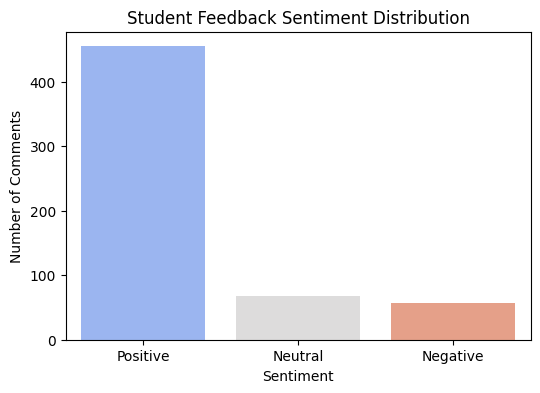

In [38]:
import seaborn as sns
import matplotlib.pyplot as plt

# Count of sentiments
sentiment_counts = df['Sentiment'].value_counts()

# Bar chart
plt.figure(figsize=(6, 4))
sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette='coolwarm')
plt.title("Student Feedback Sentiment Distribution")
plt.xlabel("Sentiment")
plt.ylabel("Number of Comments")
plt.show()


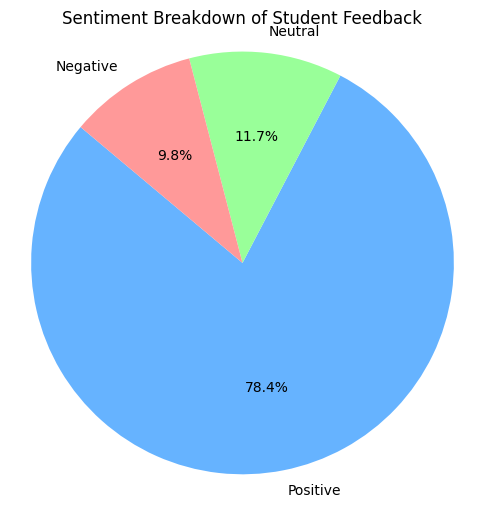

In [39]:
# Pie chart
plt.figure(figsize=(6, 6))
plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%', startangle=140, colors=['#66b3ff','#99ff99','#ff9999'])
plt.title("Sentiment Breakdown of Student Feedback")
plt.axis('equal')
plt.show()


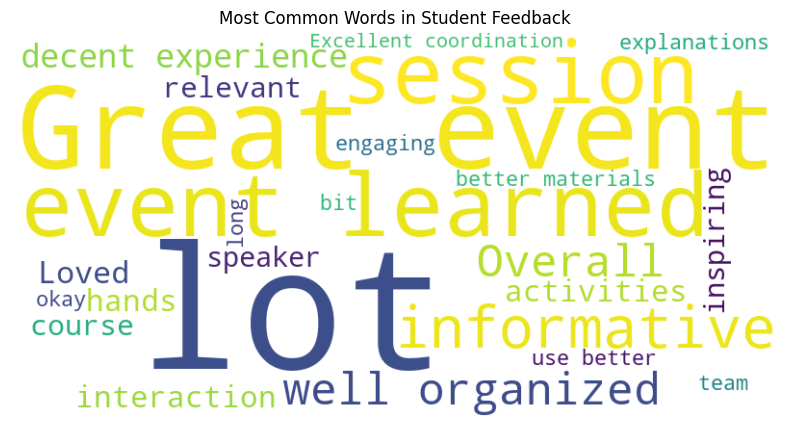

In [40]:
from wordcloud import WordCloud

# Combine all feedback text
text = ' '.join(df['FeedbackText'].dropna().astype(str))

# Generate word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Display
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most Common Words in Student Feedback')
plt.show()


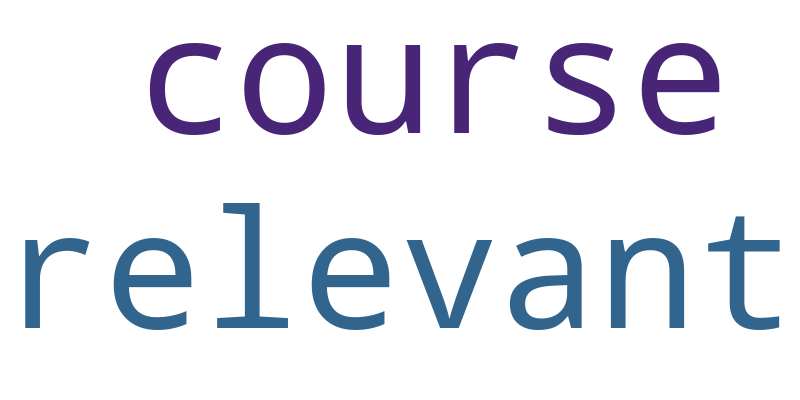

In [41]:
neg_text = ' '.join(df[df['Sentiment'] == 'Negative']['FeedbackText'].astype(str))
WordCloud(width=800, height=400, background_color='white').generate(neg_text).to_image()
